In [7]:
%pip install dmba

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ModuleNotFoundError: No module named 'dmba'

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')
print(df.head())

     QKEY INTERVIEW_START_W119   INTERVIEW_END_W119  DEVICE_TYPE_W119  \
0  100314  12/13/2022 23:12:27  12/13/2022 23:23:59                 2   
1  100363  12/13/2022 19:50:59  12/13/2022 20:05:29                 2   
2  100598  12/14/2022 16:30:21  12/14/2022 16:47:21                 1   
3  100637  12/14/2022 08:22:09  12/14/2022 08:33:45                 1   
4  100803  12/15/2022 09:05:46  12/15/2022 09:22:29                 1   

   LANG_W119  FORM_W119  DESRISK_COMF_W119  DESRISK_CREAT_W119  \
0          1          1                  4                   3   
1          1          2                  3                   3   
2          1          1                  4                   4   
3          1          2                  2                   1   
4          1          2                  3                   3   

   DESRISK_NTECH_W119  RISK2_W119  ...  F_PARTYLN_FINAL  F_PARTYSUM_FINAL  \
0                   4           2  ...                                  1   
1         

C:\Users\ljr10\AppData\Local\Temp\ipykernel_29412\3326262415.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')


In [ ]:
columns_list = df.columns.tolist()
print(columns_list)

['QKEY', 'INTERVIEW_START_W119', 'INTERVIEW_END_W119', 'DEVICE_TYPE_W119', 'LANG_W119', 'FORM_W119', 'DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119', 'AI_HEARD_W119', 'CNCEXC_W119', 'USEAI_W119', 'AIKNOW1_W119', 'AIKNOW2_W119', 'AIKNOW3_W119', 'AIKNOW5_W119', 'AIKNOW6_W119', 'AIKNOW7_W119', 'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119', 'AIKNOW_INDEX_W119', 'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119', 'MEDBIAS_W119', 'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119', 'HCMEDBIAS_W119', 'BIASBETR_OE1_W119', 'BIASBETR_OE2_W119', 'BIASBETR_OE3_W119', 'BIASBETR_REFUSED_W119', 'BIASWORS_OE1_W119', 'BIASWORS_OE2_W119', 'BIASWORS_OE3_W119', 'BIASWORS_REFUSED_W119', 'BIASSAME_OE1_W119', 'BIASSAME_OE2_W119', 'BIASSAME_OE3_W119', 'BIASSAME_REFUSED_W119', 'SCDETECT1_W119', 'SCDETECT2_W119', 'SCDETECT3_W119', 'S

In [22]:
personality_tech_vars = [
    'DESRISK_COMF',  # Comfortable taking risks
    'DESRISK_CREAT', # Creative thinker
    'DESRISK_NTECH', # Enjoy using new technology
    'RISK2'          # Taking risks usually pays off / leads to problems
]
ai_attitude_vars = [
    'AI_HEARD',  # How much have you heard or read about AI
    'CNCEXC',    # Does AI make you more excited or concerned
    'USEAI'      # How often do you interact with AI
]

healthcare_ai_vars = [
    'AIHCCOMF',        # AI in health care - comfort level
    'AIHCTRT1',        # AI in health - leads to better or worse outcomes
    'AIHCTRT2',        # Concern about AI in health developing too fast or too slow
    'MEDBIAS',         # Racial bias issues in healthcare
    'AIHCCHG_QUAL',    # AI's impact on healthcare quality
    'AIHCCHG_MIST',    # Impact on error rates
    'AIHCCHG_REL',     # Impact on doctor-patient relationship
    'AIHCCHG_RACETHN', # Impact on fairness
    'AIHCCHG_SECUR',   # Impact on health data security
    'HCMEDBIAS',       # Can AI improve/worsen racial bias in healthcare
    'BIASBETR',        # Open-ended reason: better
    'BIASWORS',        # Open-ended reason: worse
    'BIASSAME'         # Open-ended reason: same
]
ai_application_vars = [
    # Skin cancer detection
    'SCDETECT1', 'SCDETECT2', 'SCDETECT3', 'SCDETECT4',
    # Mental health chatbot
    'AIMH1', 'AIMH2', 'AIMH3', 'AIMH5',
    # AI for pain medication dosage
    'AIPAIN1', 'AIPAIN2', 'AIPAIN3', 'AIPAIN4',
    # Surgical robots
    'SROBOT1', 'SROBOT2', 'SROBOT3',
    # Protein structure prediction
    'AIPROT1', 'AIPROT2',
    # Drought-resistant crops
    'AICROP1', 'AICROP2',
    # Extreme weather prediction
    'AIEXT1', 'AIEXT2',
    # AI-written news
    'AINEWS1', 'AINEWS2',
    # AI-generated images/art
    'AIIMAG1', 'AIIMAG2'
]
employment_vars = [
    'EMPLSIT',       # Current employment status
    'JOBAPPYR',      # Applied for a job in the past year
    'INDUSTRY',      # Industry
    'INDUSTRYCOMBO'  # Combined industry classification
]
workplace_econ_ai_vars = [
    'AIWRK1',      # AI in the workplace - description
    'AIWRK2_a',    # Impact on workers generally
    'AIWRK2_b',    # Impact on you personally
    'AIWRK2_c',    # Impact on U.S. economy
    'AIWRK3_a',    # Help/hurt judgment for workers generally
    'AIWRK3_b',    # Help/hurt judgment for you personally
    'AIWRK3_c'     # Help/hurt judgment for U.S. economy
]
ai_hiring_fairness_vars = [
    'AIWRKH1',      # Knowledge of AI hiring
    'AIWRKH2_a',    # Support AI screening resumes
    'AIWRKH2_b',    # Support AI making final decisions
    'AIWRKH3_a',    # AI vs human hiring: aspect a
    'AIWRKH3_b',    # AI vs human hiring: aspect b
    'AIWRKH3_c',    # AI vs human hiring: aspect c
    'AIWRKH3_d',    # AI vs human hiring: aspect d
    'AIWRKH4',      # Willingness to apply to AI-hiring company
    'AIWRKH5Y',     # Open-ended reason: willing
    'AIWRKH5N',     # Open-ended reason: not willing
    'HIREBIAS1',    # Hiring bias issues
    'HIREBIAS2'     # Can AI improve/worsen hiring bias
]
workplace_monitoring_vars = [
    'AIWRKM1',      # Awareness of AI monitoring work performance
    'AIWRKM2_a',    # Support monitoring employee presence
    'AIWRKM2_b',    # Support recording computer activity
    'AIWRKM2_c',    # Support tracking employee movement
    'AIWRKM2_d',    # Support monitoring driving
    'AIWRKM2_e',    # Support evaluating employee performance
    'AIWRKM2_f',    # Support analyzing retail employee-customer interaction
    'AIWRKM3_a',    # All evaluated the same
    'AIWRKM3_b',    # Information misuse
    'AIWRKM3_c',    # Improved security
    'AIWRKM3_d',    # Less misconduct
    'AIWRKM3_e',    # Increased company profits
    'AIWRKM3_f',    # Feeling of being watched
    'AIWRKM4_a',    # Use AI info for promotion decisions
    'AIWRKM4_b',    # Use AI info for firing decisions
    'EVALBIAS1',    # Performance evaluation bias issues
    'EVALBIAS2'     # Can AI improve/worsen performance bias
]
facial_recognition_vars = [
    'FACERECWK1',      # Awareness of employer use of facial recognition
    'FACERECWK2_a',    # Used for attendance
    'FACERECWK2_b',    # Analyze facial expressions
    'FACERECWK2_c',    # Monitor break frequency
    'FACERECWK3_a',    # Misidentification of employees
    'FACERECWK3_b',    # Skin tone bias in recognition
    'FACERECWK3_c'     # Misinterpretation of expressions
]
twitter_vars = [
    'TWITTER1_MOD',  # Has Twitter account
    'TWITTER2',      # Willing to share Twitter handle
    'TWITTER3'       # Twitter handle itself
]
demographic_vars = [
    'AGE',         # Age
    'GENDER',      # Gender
    'EDUCATION',   # Education level
    'RACE',        # Race/ethnicity
    'WEIGHT_W119'  # Sample weight
]
ai_know_vars = [
    'AIKNOW1_CORRECT_W119',  # Customer service scenario (correct, weighted)
    'AIKNOW2_CORRECT_W119',  # Playing music scenario (correct, weighted)
    'AIKNOW3_CORRECT_W119',  # Email scenario (correct, weighted)
    'AIKNOW5_CORRECT_W119',  # Health products scenario (correct, weighted)
    'AIKNOW6_CORRECT_W119',  # Online shopping scenario (correct, weighted)
    'AIKNOW7_CORRECT_W119'   # Home devices scenario (correct, weighted)
    ]
industry_vars = [
    'ai_know_vars',        
    'twitter_vars', 
    'workplace_monitoring_vars'
]




                        count      mean       std  min  25%  50%  75%  max
AIKNOW1_CORRECT_W119  11004.0  0.678844  0.466942  0.0  0.0  1.0  1.0  1.0
AIKNOW2_CORRECT_W119  11004.0  0.599328  0.490057  0.0  0.0  1.0  1.0  1.0
AIKNOW3_CORRECT_W119  11004.0  0.546529  0.497853  0.0  0.0  1.0  1.0  1.0
AIKNOW5_CORRECT_W119  11004.0  0.721283  0.448388  0.0  0.0  1.0  1.0  1.0
AIKNOW6_CORRECT_W119  11004.0  0.678935  0.466907  0.0  0.0  1.0  1.0  1.0
AIKNOW7_CORRECT_W119  11004.0  0.659215  0.473995  0.0  0.0  1.0  1.0  1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AIKNOW1_CORRECT_W119  11004 non-null  int64
 1   AIKNOW2_CORRECT_W119  11004 non-null  int64
 2   AIKNOW3_CORRECT_W119  11004 non-null  int64
 3   AIKNOW5_CORRECT_W119  11004 non-null  int64
 4   AIKNOW6_CORRECT_W119  11004 non-null  int64
 5   AIKNOW7_CORRECT_W11

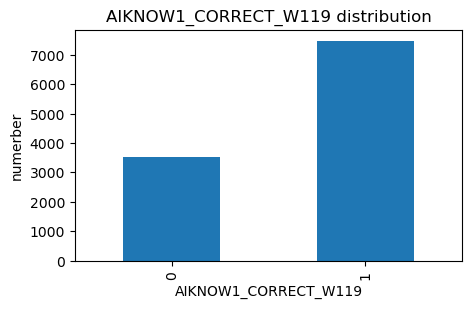

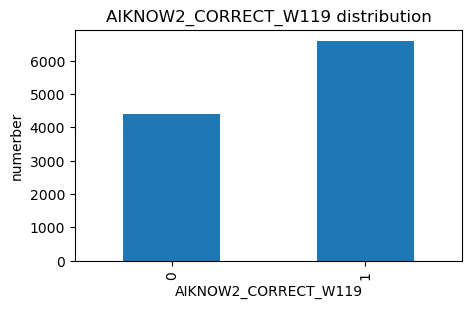

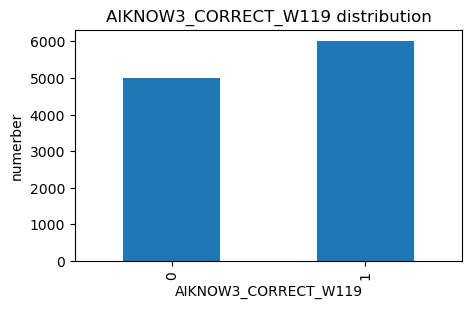

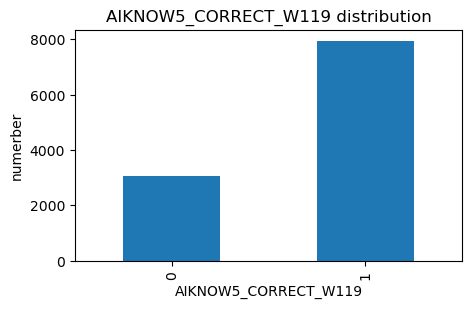

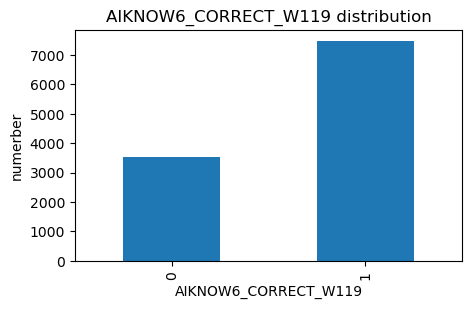

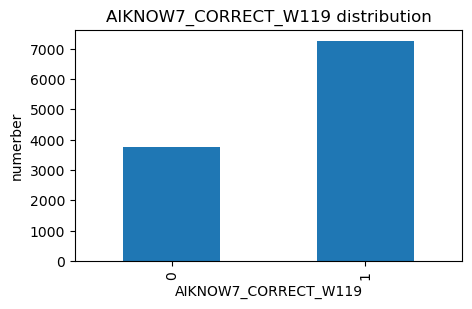

In [27]:
#print(df.shape)      
#print(df.head())     
#print(df.tail())     
#print(df.info())     
#print(df.describe().T) 
#print(df.isnull().sum())   
#print(df.duplicated().sum()) 


df_ai_know = df[ai_know_vars]
print(df_ai_know.describe().T)
print(df_ai_know.info())
import matplotlib.pyplot as plt

for col in ai_know_vars:
    plt.figure(figsize=(5,3))
    df_ai_know[col].value_counts(dropna=False).sort_index().plot(kind='bar')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('numerber')
    plt.show()



Columns for ai_know_vars:
   AIKNOW1_CORRECT_W119  AIKNOW2_CORRECT_W119  AIKNOW3_CORRECT_W119  \
0                     0                     0                     0   
1                     1                     1                     1   
2                     1                     1                     1   
3                     1                     0                     0   
4                     0                     0                     0   

   AIKNOW5_CORRECT_W119  AIKNOW6_CORRECT_W119  AIKNOW7_CORRECT_W119  
0                     0                     0                     0  
1                     1                     1                     1  
2                     1                     1                     1  
3                     1                     0                     0  
4                     1                     1                     1  


KeyError: "None of [Index(['TWITTER1_MOD', 'TWITTER2', 'TWITTER3'], dtype='object')] are in the [columns]"